In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer

from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

'''
Variables: 
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) 
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters 

''';

In [6]:
def dim_red(mat, p, method):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list 
        p : number of dimensions to keep 
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''
    if method=='ACP':
        red_mat = mat[:,:p]
        
    elif method=='TSNE':
        p = 3   # TNSE does'nt allow more than 3 component
        r_mat = TSNE(n_components=p,
                     learning_rate='auto',
                     init='random', 
                     perplexity=3).fit_transform(mat)
        red_mat = r_mat[:,:p]
        
    elif method=='UMAP':
        red_mat = mat[:,:p]
        
    else:
        raise Exception("Please select one of the three methods : APC, AFC, UMAP")
    
    return red_mat

In [7]:
def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list 
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    
    km = KMeans(n_clusters=k,
    init='random',
    n_init=10,
    tol=1e-04,
    max_iter=300,
    random_state=0).fit(mat)
    
    return km.labels_

In [46]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# perform dimentionality reduction
red_emb = dim_red(embeddings, 3, method='TSNE')

# perform clustering
pred = clust(red_emb, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')


NMI: 0.36 
ARI: 0.17


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

# Experiments

In [11]:
embeddings.shape

(2000, 384)

In [15]:
# apply TSNE reduction

X_embedded = TSNE(n_components=2, 
                  learning_rate='auto',                  init='random', 
                  perplexity=3).fit_transform(embeddings)
X_embedded.shape

(2000, 2)

In [10]:
# test reduction
mat_red = dim_red(mat=embeddings, p=3, method='TSNE')

In [55]:
unique_labels = set(labels)
color_mapping = {topic: i for i, topic in enumerate(unique_labels)}
topic_colors = [color_mapping[topic] for topic in labels]
# len(topic_colors)

8

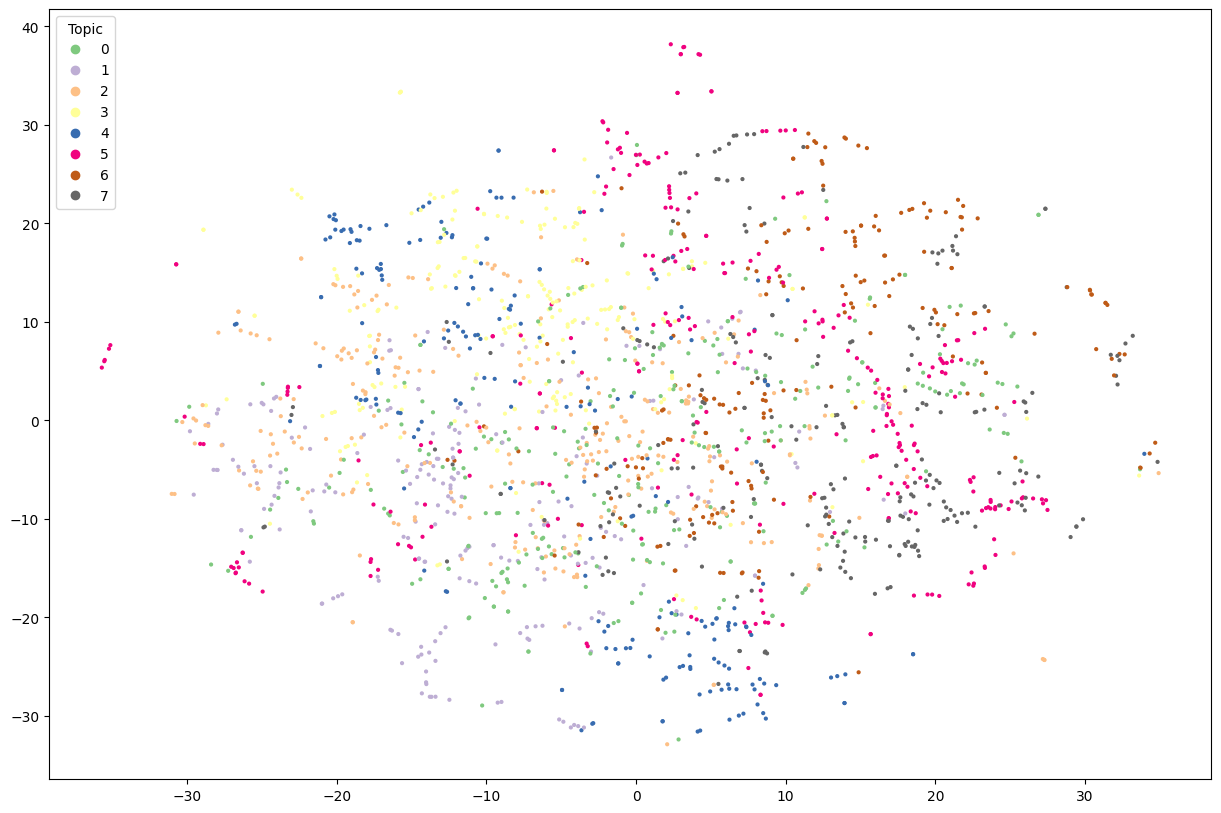

In [51]:
fig, ax = plt.subplots(#nrows=2, 
    #ncols=2, 
    figsize=(15, 10))

# visualisation
scatter = ax.scatter(
    x=mat_red[:, 0],
    y=mat_red[:, 1],
    c=topic_colors,
    cmap='Accent',
    s=4,
    alpha=1
)
handles, labels = scatter.legend_elements()
ax.legend(handles, unique_labels, loc="upper left", title="Topic")
#plt.setp(ax, xticks=[], yticks=[])
#cbar = fig.colorbar(scatter, ax=ax, boundaries=np.arange(21)-0.4)
#cbar.set_ticks(np.arange(20))
#cbar.set_ticklabels(labels, size=10)

In [23]:
kmeans_per_k =\
    [KMeans(
    n_clusters=k,
    init='random',
    n_init=10,
    tol=1e-04,
    max_iter=300,
    random_state=0
    ).fit(mat_red)
    for k in range(1, 11)]

In [24]:
inertias = [model.inertia_ for model in kmeans_per_k]

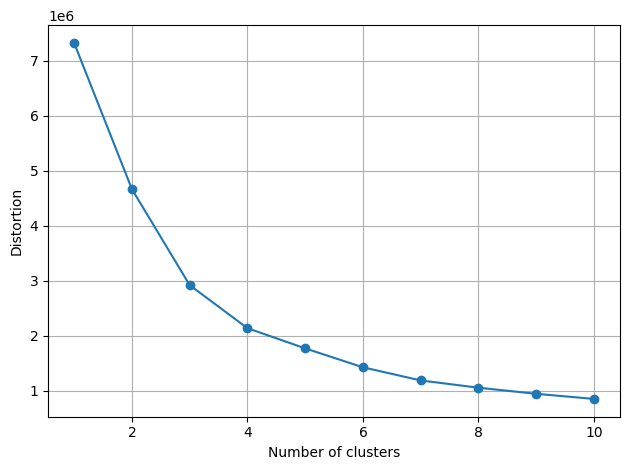

In [25]:
plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.grid()

NameError: name 'dim_red' is not defined